# Loading Refractive Index Data
_written by Jaren Ashcraft_

Polarization ray tracing is a core part of what Poke does, which requires a raytrace file, material data, and the _patience_ to simulate optical polarization. In this demo, we illustrate how we tried to make loading material data just one step easier. 

The folks at <a href="https://refractiveindex.info">RefractiveIndex.INFO</a> [1] have assembled an incredibly useful library of different optical materials and their properties. Not only that, but they made their database free to use and distribute under the [CC0 1.0 Universal Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/) so that other investigators can use it as they please.

In Poke, we make use of this catalogue to provide our users with easilly-accessible material data that will enable polarization ray tracing simulations.

**References**
- [1] M. N. Polyanskiy, "Refractive index database," https://refractiveindex.info. Accessed on 2023-12-08.

## A simple index model
Refractive index data is typically available on a nonuniform set of samples as a function of wavelength. In order to choose our sampling along this curve we use `scipy.interpolate` to create 1D splines of the data that are callable. We demonstrate a simple example of this here. 

To see the materials currently available in Poke, import `avail_materials` from `poke.materials`

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from poke.materials import create_index_model, avail_materials
print(avail_materials)

['Al', 'Ag', 'HfO2', 'SiO2', 'Ta2O5', 'TiO2', 'Nb2O5', 'SiN', 'MgF2', 'CaF2', 'LiF', 'Silica']


Creating an index model is done by simply supplying one of the strings from this list to the `create_index_model` function, which generates a spline at the limits of the data.

In [16]:
# A simple Aluminum reflector
wvl = np.arange(0.4,1,0.01) # wavelength, microns
n_Al = create_index_model('Al')

**This function assumes that the supplied wavelength is in microns**. We can plot it and observe that the fit to the data is quite good.

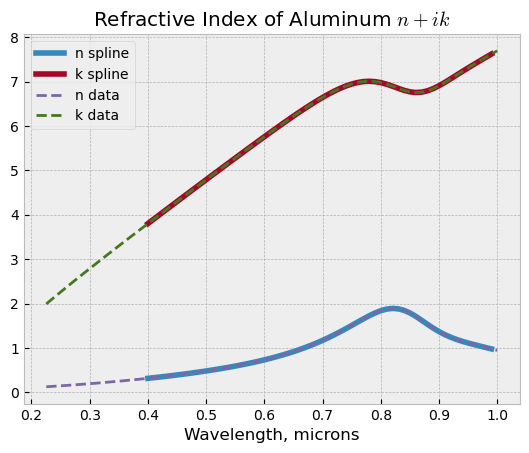

In [35]:
pth_to_Al = '../../poke/material_data/Cheng_Al.csv'
Al_data = np.genfromtxt(pth_to_Al,skip_header=1,delimiter=',').T
n_Al_data = Al_data[1,:427]
k_Al_data = Al_data[1,428:]
wvl_data = Al_data[0,:427]

n = np.real(n_Al(wvl))
k = np.imag(n_Al(wvl))

plt.style.use('bmh') # because it's pretty
plt.figure()
plt.plot(wvl,n,label='n spline',linewidth=4)
plt.plot(wvl,k,label='k spline',linewidth=4)
plt.plot(wvl_data,n_Al_data,label='n data', linestyle='dashed')
plt.plot(wvl_data,k_Al_data,label='k data', linestyle='dashed')
plt.title('Refractive Index of Aluminum ' + r'$n + ik$')
plt.legend()
plt.xlabel('Wavelength, microns')
plt.show()